# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import csv
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [4]:
#cities = ["severo-kurilsk", "narsaq", "punta arenas", "provideniya", "broome","castro", "nguiu"]

# set up lists to hold reponse info

lon = []
temp = []
lat = []
cloudy = []
wind = []
humidity = []
country = []
date = []
city_name = []

# loop through cities, make API request, and append desired results
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat']) 
        cloudy.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(city)
    except:
        pass
    
print(f"Longitude: {lon}")
print(f"temp: {temp}")
print(f"Latitude: {lat}")
print(f"Couldy: {cloudy}")
print(f"wind: {wind}")
print(f"humidity: {humidity}")
print(f"country: {country}")
print(f"date: {date}")

Longitude: [-52.1, -117.29, 10.93, 8.56, -70.91, -114.38, 159.24, -159.78, -99.26, -94.76, -58.74, 102.2, -134.97, -73.75, -147.8, 147.33, 168.86, -65.37, 172.64, 102.47, -124.16, -92.44, 88.52, -63.03, -68.93, -109.91, -58.16, 30.79, -79, -67.52, -117.29, 14.43, 73.02, 15.16, -79.94, -59.52, 85.52, -68.31, 103.14, -90.35, -52.73, -124.16, 87.21, 21.3, 74.49, 98.19, -0.88, -71.14, 80.55, -37.64, 58.98, -133.03, -155.08, -84.5, 121.6, 128.87, 18.42, 147.9, 149.07, 116.91, -73.98, 147.27, 12.69, -173.23, -74.98, 29.75, -16.54, 51.56, -50.22, 153.24, -123.21, 88.39, -139.03, -135.01, -73.48, -86.95, -115, 14.13, 38.73, 130.99, -28.7, -45.44, 57.7, 150.18, 23.93, -6.59, 14.95, 133.23, 32.44, 67.39, -65.72, -69.36, 161.92, 35.38, -104.02, -73.83, -72.07, 57.76, 63.45, -97.86, 147.63, -68.87, 147.26, -127.42, 88.66, -115.58, -60.23, -69.22, -71.34, 121.89, -41.05, 82.6, 101.77, 170.27, 26.64, -41.86, -56.83, 57.66, 48.48, 13.98, -86.92, -99.65, 20.04, -159.32, 115.35, 27.91, -105.3, -120.46,

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_data = {"City": city_name, "Max Temp": temp, "Lon": lon, "Lat":lat, "cloudiness":cloudy, "Wind Speed ": wind, "Humidity": humidity, "Country": country, "Date": date}
weather_data = pd.DataFrame(weather_data)
weather_data

,City,Max Temp,Lon,Lat,cloudiness,Wind Speed,Humidity,Country,Date
0,rio grande,3.33,-52.10,-32.03,20,2.50,93,BR,1567657115
1,nelson,17.78,-117.29,49.49,26,0.79,62,CA,1567657568
2,jalingo,23.46,10.93,10.30,99,2.23,90,NG,1567657568
3,arona,20.56,8.56,45.76,40,2.60,100,IT,1567657568
4,punta arenas,2.00,-70.91,-53.16,75,3.10,84,CL,1567657569
5,yellowknife,11.00,-114.38,62.45,75,2.10,71,CA,1567657569
6,evensk,11.53,159.24,61.92,88,6.07,59,RU,1567657569
7,avarua,24.00,-159.78,-21.21,98,7.20,60,CK,1567657404
8,tecoanapa,28.00,-99.26,16.99,40,1.50,78,MX,1567657570
9,kodiak,20.00,-94.76,39.95,1,1.50,88,US,1567657570


In [6]:
weather_data.to_csv("cityweather.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

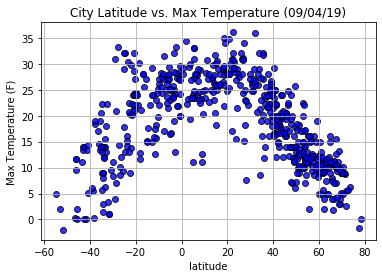

In [7]:
plt.scatter(lat,temp,color="blue",edgecolor ="black", linewidths = 1, marker ="o", alpha = 0.8, label = "cities")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("latitude")

# Save the figure
plt.savefig("lat_vs_temp.png")

plt.grid(True)

#### Latitude vs. Humidity Plot

In [8]:
weather_data.Humidity = weather_data.Humidity.clip(lower =0, upper=100)


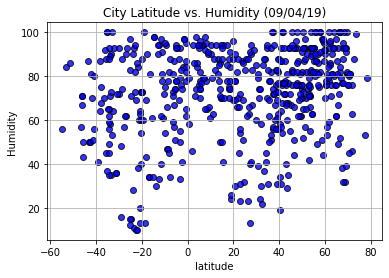

In [9]:
plt.scatter(lat,weather_data.Humidity,color="blue",edgecolor ="black", linewidths = 1, marker ="o", alpha = 0.8, label = "cities")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("latitude")

# Save the figure
plt.savefig("lat_vs_humidity.png")

plt.grid(True)

#### Latitude vs. Cloudiness Plot

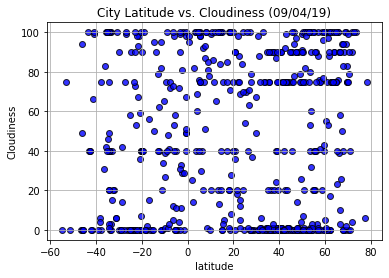

In [10]:
plt.scatter(lat,cloudy,color="blue",edgecolor ="black", linewidths = 1, marker ="o", alpha = 0.8, label = "cities")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("latitude")

# Save the figure
plt.savefig("lat_vs_clouds.png")

plt.grid(True)

#### Latitude vs. Wind Speed Plot

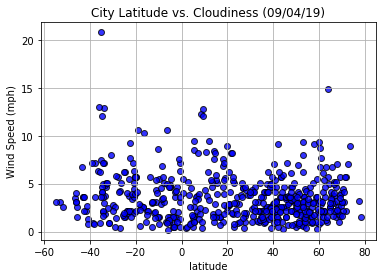

In [11]:
plt.scatter(lat,wind,color="blue",edgecolor ="black", linewidths = 1, marker ="o", alpha = 0.8, label = "cities")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("latitude")

# Save the figure
plt.savefig("lat_vs_wind.png")

plt.grid(True)

In [ ]:
#1. More cities with higher humidity fall within 40 to 80 degrees latitude. 
#2. The temperature begins to rise closer to 0 to 20 degrees latitude. 
#3. Cloudiness doesn't appear to be impacted by latitude. 